In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import font_manager as fm

In [2]:
train_data=pd.read_csv('./splitsent_data/trainset.csv')

In [3]:
train_data["BACKGROUND"] = train_data["Task 1"].str.contains("BACKGROUND").astype(int)

In [4]:
train_data["OBJECTIVES"] = train_data["Task 1"].str.contains("OBJECTIVES").astype(int)

In [5]:
train_data["METHODS"] = train_data["Task 1"].str.contains("METHODS").astype(int)
train_data["RESULTS"] = train_data["Task 1"].str.contains("RESULTS").astype(int)
train_data["CONCLUSIONS"] = train_data["Task 1"].str.contains("CONCLUSIONS").astype(int)
train_data["OTHERS"] = train_data["Task 1"].str.contains("OTHERS").astype(int)

In [6]:
train_data.head()

,Id,Abstract,Task 1,BACKGROUND,OBJECTIVES,METHODS,RESULTS,CONCLUSIONS,OTHERS
0,D05945,wasserstein metric earth mover's distance (emd...,BACKGROUND BACKGROUND BACKGROUND/OBJECTIVES ME...,1,1,1,1,0,0
1,D05130,compared word embedding based point representa...,BACKGROUND BACKGROUND OBJECTIVES/METHODS METHO...,1,1,1,1,1,0
2,D01150,standard time-to-live (ttl) cache management p...,BACKGROUND OBJECTIVES OBJECTIVES METHODS METHO...,1,1,1,1,1,0
3,D06784,rise social media enabling people freely expre...,CONCLUSIONS METHODS BACKGROUND BACKGROUND BACK...,1,0,1,0,1,0
4,D06833,high-resolution depth maps inferred low-resolu...,BACKGROUND OBJECTIVES/METHODS METHODS METHODS/...,1,1,1,1,1,0


In [91]:
labels=dict()
labels["BACKGROUND"]=train_data["BACKGROUND"].sum()
labels["OBJECTIVES"]=train_data["OBJECTIVES"].sum()
labels["METHODS"]=train_data["METHODS"].sum()
labels["RESULTS"]=train_data["RESULTS"].sum()
labels["CONCLUSIONS"]=train_data["CONCLUSIONS"].sum()
labels["OTHERS"]=train_data["OTHERS"].sum()

In [95]:
sum(labels.values())

25716

In [100]:
[{'non-'+k:1-labels[k]/sum(labels.values())} for k in labels.keys()]

[{'non-BACKGROUND': 0.7979468035464302},
 {'non-OBJECTIVES': 0.7855420749727796},
 {'non-METHODS': 0.7909083838855188},
 {'non-RESULTS': 0.7876419349821123},
 {'non-CONCLUSIONS': 0.8630813501322134},
 {'non-OTHERS': 0.9748794524809458}]

In [7]:
train_=pd.read_csv('./data/task1_trainset.csv')

In [8]:
categories=[]
for r in train_['Categories']:
    for c in r.split('/'):
        if c not in categories:
            categories.append(c)

In [77]:
test_=pd.read_csv('./data/task1_public_testset.csv')

In [78]:
for r in test_['Categories']:
    for c in r.split('/'):
        if c not in categories:
            categories.append(c)

In [79]:
len(categories)

156

In [86]:
categories_train=pd.DataFrame()
for c in categories:
    categories_train[c]=test_['Categories'].append(train_['Categories']).str.contains(c).astype(int)

In [87]:
cat_sum=dict()
for c in categories:
    cat_sum[c]=categories_train[c].sum()

In [88]:
cat_sum=sorted(cat_sum.items(), key=lambda cat_sum:cat_sum[1],reverse=True)

In [89]:
cat_sum=dict(cat_sum)

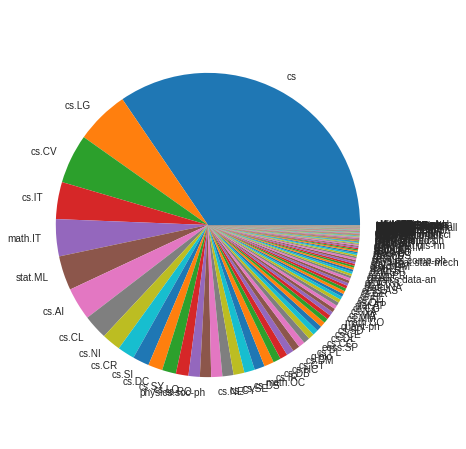

In [90]:
plt.style.use('seaborn-white')
plt.figure(figsize=(6,8))
texts,autotexts =plt.pie(cat_sum.values(),labels=cat_sum.keys())
plt.axis('equal')
#fontsize
proptease = fm.FontProperties()
proptease.set_size('medium')
plt.setp(autotexts, fontproperties=proptease)
plt.show()



In [ ]:
## 句子順序跟其label的圖
